<a href="https://colab.research.google.com/github/pramod-mamidi/DAs/blob/master/K_means_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from sklearn.cluster import DBSCAN
from sklearn import preprocessing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
!wget -O Cust_Segmentation.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/Cust_Segmentation.csv

--2020-05-12 12:04:21--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/Cust_Segmentation.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 34276 (33K) [text/csv]
Saving to: ‘Cust_Segmentation.csv’

Cust_Segmentation.c 100%[===================>]  33.47K  --.-KB/s    in 0.02s   

2020-05-12 12:04:21 (2.14 MB/s) - ‘Cust_Segmentation.csv’ saved [34276/34276]



In [3]:
data=pd.read_csv('Cust_Segmentation.csv')
data.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


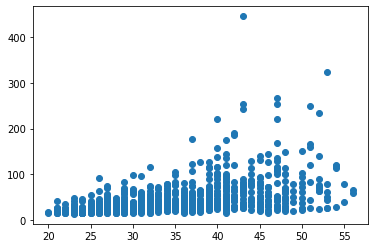

In [4]:
plt.scatter(data['Age'],data['Income'])

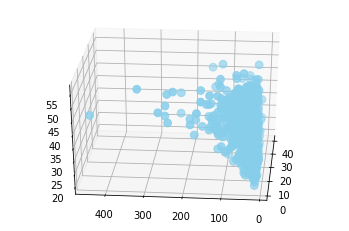

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['DebtIncomeRatio'], data['Income'], data['Age'], c='skyblue', s=60)
ax.view_init(30, 185)
plt.show()

In [6]:
data.drop(columns=['Address'],inplace=True)
print(data)

     Customer Id  Age  Edu  ...  Other Debt  Defaulted  DebtIncomeRatio
0              1   41    2  ...       1.073        0.0              6.3
1              2   47    1  ...       8.218        0.0             12.8
2              3   33    2  ...       5.802        1.0             20.9
3              4   29    2  ...       0.516        0.0              6.3
4              5   47    1  ...       8.908        0.0              7.2
..           ...  ...  ...  ...         ...        ...              ...
845          846   27    1  ...       1.220        NaN              6.8
846          847   28    2  ...       2.021        0.0              7.0
847          848   25    4  ...       3.210        1.0             33.4
848          849   32    1  ...       0.696        0.0              2.9
849          850   52    1  ...       3.638        0.0              8.6

[850 rows x 9 columns]


In [7]:
x=data[np.array(data.columns)].values
x[0:5]

array([[1.000e+00, 4.100e+01, 2.000e+00, 6.000e+00, 1.900e+01, 1.240e-01,
        1.073e+00, 0.000e+00, 6.300e+00],
       [2.000e+00, 4.700e+01, 1.000e+00, 2.600e+01, 1.000e+02, 4.582e+00,
        8.218e+00, 0.000e+00, 1.280e+01],
       [3.000e+00, 3.300e+01, 2.000e+00, 1.000e+01, 5.700e+01, 6.111e+00,
        5.802e+00, 1.000e+00, 2.090e+01],
       [4.000e+00, 2.900e+01, 2.000e+00, 4.000e+00, 1.900e+01, 6.810e-01,
        5.160e-01, 0.000e+00, 6.300e+00],
       [5.000e+00, 4.700e+01, 1.000e+00, 3.100e+01, 2.530e+02, 9.308e+00,
        8.908e+00, 0.000e+00, 7.200e+00]])

In [8]:
x=preprocessing.StandardScaler().fit(x).transform(x)
x[0:5]

array([[-1.7300143 ,  0.74291541,  0.31212243, -0.37878978, -0.71845859,
        -0.68381116, -0.59048916, -0.59494973, -0.57652509],
       [-1.72593888,  1.48949049, -0.76634938,  2.5737211 ,  1.38432469,
         1.41447366,  1.51296181, -0.59494973,  0.39138677],
       [-1.72186347, -0.25251804,  0.31212243,  0.2117124 ,  0.26803233,
         2.13414111,  0.80170393,  1.68081427,  1.59755385],
       [-1.71778805, -0.75023477,  0.31212243, -0.67404087, -0.71845859,
        -0.42164323, -0.75446707, -0.59494973, -0.57652509],
       [-1.71371263,  1.48949049, -0.76634938,  3.31184882,  5.35624866,
         3.63890032,  1.71609424, -0.59494973, -0.44250653]])

In [26]:
clstr = DBSCAN(eps=0.3,min_samples=2)
x=np.nan_to_num(x)
clstr.fit(x)
lb=clstr.labels_
cc=clstr.core_sample_indices_
print(lb)
print(cc)

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  2 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  2 -1 -1 -1 -1 -1 -1 -1  3 -1 -1 -1
 -1 -1 -1 -1  3 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1  4 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  4
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1

In [27]:
data["labels"]=lb
data.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,labels
0,1,41,2,6,19,0.124,1.073,0.0,6.3,-1
1,2,47,1,26,100,4.582,8.218,0.0,12.8,-1
2,3,33,2,10,57,6.111,5.802,1.0,20.9,-1
3,4,29,2,4,19,0.681,0.516,0.0,6.3,-1
4,5,47,1,31,253,9.308,8.908,0.0,7.2,-1


In [28]:
data.groupby('labels').mean()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
labels,,,,,,,,,
-1,427.258993,35.091127,1.721823,8.604317,47.069544,1.598703,3.108338,0.266764,10.229257
0,143.000000,28.500000,2.000000,6.000000,21.500000,0.509500,1.963000,0.000000,11.500000
1,204.000000,36.500000,1.000000,19.500000,43.000000,0.909500,4.457500,NaN,12.500000
2,242.000000,39.000000,1.000000,9.500000,33.000000,0.209000,1.410000,0.000000,4.900000
3,265.000000,40.000000,1.000000,2.500000,25.500000,0.297000,1.490500,0.000000,7.000000
4,304.000000,30.000000,1.000000,1.000000,19.500000,0.942500,1.147500,0.000000,10.750000
5,343.000000,23.500000,1.000000,1.500000,19.000000,0.018500,0.180500,0.000000,1.100000
6,569.000000,25.500000,1.000000,4.000000,21.500000,0.285500,0.852500,0.000000,5.300000
7,600.500000,31.500000,1.000000,8.500000,26.000000,0.318000,0.800000,0.000000,4.300000


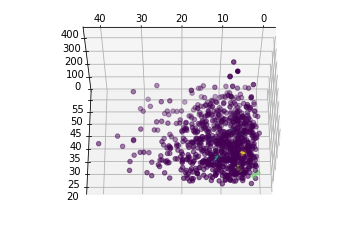

In [46]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['DebtIncomeRatio'], data['Income'], data['Age'],c=lb.astype(np.float))
ax.view_init(-30,-630)
plt.show()